#IMPORTING LIBRARIES AND FILES


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SALES/TWO_YEARS_SALES.csv')

#DATA PREPROCESSING


In [4]:
#converting order date to date format
df['order_date']=pd.to_datetime(df.order_date,dayfirst=True)

## HANDLING NULL VALUES

In [5]:
df.fillna(3)

,order_date,sales_id,customer_id,product_id,price_per_unit,quantity,sales,state
0,2021-01-01,1,4,769,109,1.0,109,Northern Territory
1,2021-01-01,2,123,616,112,1.0,112,South Australia
2,2021-01-01,3,143,837,117,1.0,117,Australian Capital Territory
3,2021-01-02,4,94,458,118,3.0,354,Queensland
4,2021-01-02,5,111,660,93,3.0,279,Queensland
...,...,...,...,...,...,...,...,...
2069,2022-12-27,990,140,575,100,1.0,100,Tasmania
2070,2022-12-28,991,157,493,102,2.0,204,Australian Capital Territory
2071,2022-12-29,992,39,148,91,3.0,273,Victoria
2072,2022-12-30,993,108,1193,105,3.0,315,Victoria


##SPLITTING DATA

In [6]:
df1=df[:1080]

In [7]:
df1

,order_date,sales_id,customer_id,product_id,price_per_unit,quantity,sales,state
0,2021-01-01,1,4,769,109,1.0,109,Northern Territory
1,2021-01-01,2,123,616,112,1.0,112,South Australia
2,2021-01-01,3,143,837,117,1.0,117,Australian Capital Territory
3,2021-01-02,4,94,458,118,3.0,354,Queensland
4,2021-01-02,5,111,660,93,NaN,279,Queensland
...,...,...,...,...,...,...,...,...
1075,2021-12-27,1078,83,260,95,2.0,190,New South Wales
1076,2021-12-28,1079,200,758,109,3.0,327,South Australia
1077,2021-12-29,1080,13,835,117,1.0,117,Northern Territory
1078,2021-12-30,1081,135,730,119,2.0,238,Australian Capital Territory


In [8]:
df2=df[1080:2073]

In [9]:
df2

,order_date,sales_id,customer_id,product_id,price_per_unit,quantity,sales,state
1080,2022-01-01,1,163,43,104,3.0,312,Western Australia
1081,2022-01-02,2,20,571,100,1.0,100,Northern Territory
1082,2022-01-02,3,82,528,98,3.0,294,Northern Territory
1083,2022-01-03,4,115,1196,105,1.0,105,Northern Territory
1084,2022-01-03,5,156,438,107,2.0,214,Northern Territory
...,...,...,...,...,...,...,...,...
2068,2022-12-27,989,95,444,107,1.0,107,Queensland
2069,2022-12-27,990,140,575,100,1.0,100,Tasmania
2070,2022-12-28,991,157,493,102,2.0,204,Australian Capital Territory
2071,2022-12-29,992,39,148,91,3.0,273,Victoria


## COMBINING DAILY SALES

In [10]:
daily_sales_2021=df1.groupby('order_date').agg({'sales_id': 'first', 'sales': 'sum'}).reset_index()

In [11]:
daily_sales_2022=df2.groupby('order_date').agg({'sales_id': 'first', 'sales': 'sum'}).reset_index()

In [12]:
daily_sales_2022

,order_date,sales_id,sales
0,2022-01-01,1,312
1,2022-01-02,2,394
2,2022-01-03,4,319
3,2022-01-04,6,184
4,2022-01-07,7,351
...,...,...,...
318,2022-12-26,987,234
319,2022-12-27,988,387
320,2022-12-28,991,204
321,2022-12-29,992,273


## ADDING A MONTH COLUMN

In [13]:
daily_sales_2021['month'] = daily_sales_2021['order_date'].dt.month
daily_sales_2022['month'] = daily_sales_2022['order_date'].dt.month


In [14]:
monthly_sales_2021=daily_sales_2021.groupby('month').agg({'order_date': 'first', 'sales': 'sum'}).reset_index()

In [15]:
monthly_sales_2021

,month,order_date,sales
0,1,2021-01-01,21533
1,2,2021-02-01,19609
2,3,2021-03-01,23490
3,4,2021-04-01,21581
4,5,2021-05-01,15360
5,6,2021-06-01,20460
6,7,2021-07-01,21942
7,8,2021-08-01,23082
8,9,2021-09-01,21107
9,10,2021-10-01,19275


In [16]:
#daily_sales_2021['month'] = daily_sales_2021['order_date'].dt.month
monthly_sales_2022=daily_sales_2022.groupby('month').agg({'order_date': 'first', 'sales': 'sum'}).reset_index()

In [17]:
monthly_sales_2022

,month,order_date,sales
0,1,2022-01-01,5519
1,2,2022-02-01,19350
2,3,2022-03-01,23681
3,4,2022-04-01,21264
4,5,2022-05-01,16881
5,6,2022-06-01,21376
6,7,2022-07-01,19479
7,8,2022-08-01,21580
8,9,2022-09-01,19681
9,10,2022-10-01,20213


## RESETTING INDEX AND COMBINING THE DATA

In [18]:
monthly_sales_2021.set_index('order_date',inplace=True)
monthly_sales_2022.set_index('order_date',inplace=True)

In [19]:
two_years=pd.concat([monthly_sales_2021,monthly_sales_2022])

In [20]:
two_years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   month   24 non-null     int64
 1   sales   24 non-null     int64
dtypes: int64(2)
memory usage: 576.0 bytes


In [21]:
two_years.drop(two_years.iloc[:,0:1],axis=1)

,sales
order_date,
2021-01-01,21533
2021-02-01,19609
2021-03-01,23490
2021-04-01,21581
2021-05-01,15360
2021-06-01,20460
2021-07-01,21942
2021-08-01,23082
2021-09-01,21107


In [22]:
two_years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   month   24 non-null     int64
 1   sales   24 non-null     int64
dtypes: int64(2)
memory usage: 576.0 bytes


In [23]:
#two_years.index = pd.DatetimeIndex(two_years.index).to_period('M')

# VISUALIZATION

<Axes: xlabel='order_date'>

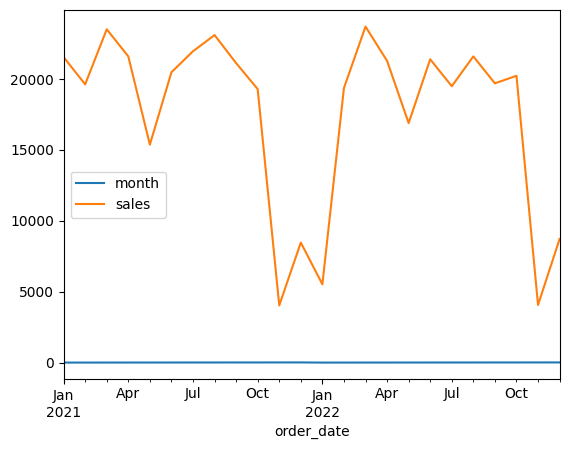

In [24]:
two_years.plot()

From the plot we can deduce that there is no fixed trend or seasonality in sales. But there is a slight pattern of cyclical behaviour in sales which may effect the forecasting sometimes. During which case we resort to alternative methods.

# MODEL TRAINING

## CHECKING STATIONARITY


Stationary time series is one whose properties do not depend on the time at which the series is observed.15 Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

TO CHECK THE STATIONARITY OF THE DATA WE CONDUCT ADFULLER TEST

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
test_result=adfuller(two_years['sales'])

In [27]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test stat','p-value','Lags used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print("strong evidence againt null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis,time series has a unit root ,indicating it is non stationary")

In [28]:
adfuller_test(two_years['sales'])

ADF Test stat:-3.4630632421687655
p-value:0.008987953835594753
Lags used:9
Number of observations used:14
strong evidence againt null hypothesis(Ho),reject the null hypothesis.Data has no unit root and is stationary


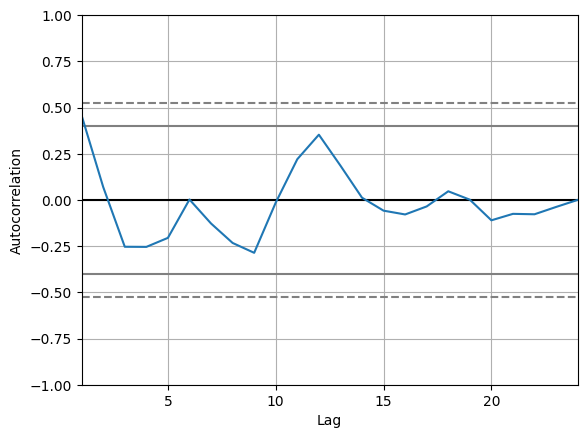

In [29]:
#auto co relative plot to cheack the randomness in the data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(two_years['sales'])
plt.show()

Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

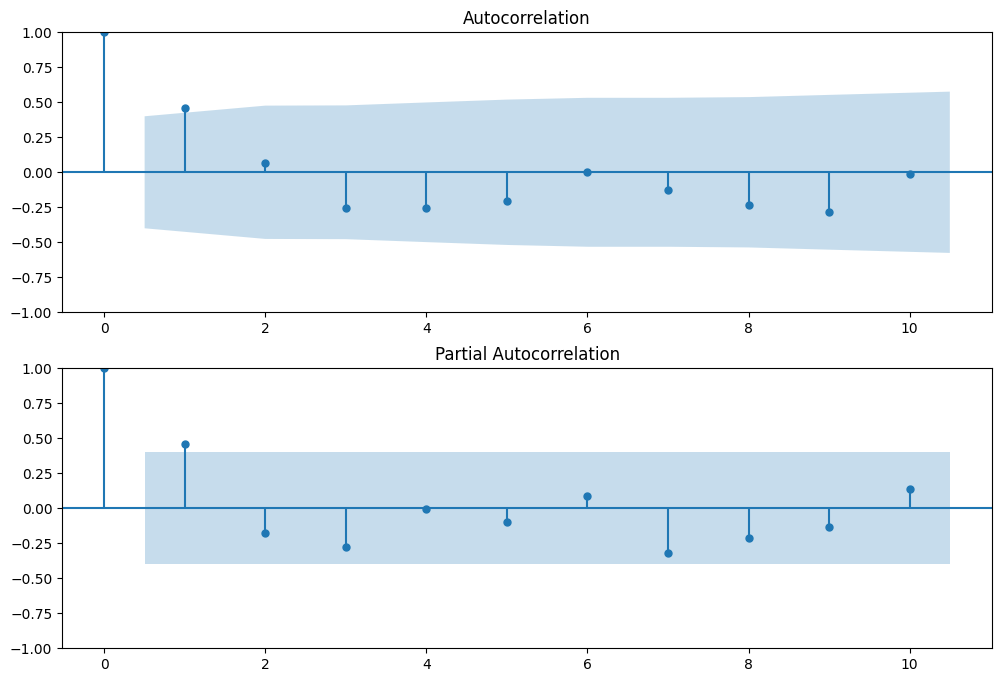

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#for auto correlation
fig = sm.graphics.tsa.plot_acf(two_years['sales'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
#partial auto corr
fig = sm.graphics.tsa.plot_pacf(two_years['sales'].dropna(),lags=10,ax=ax2)

In [35]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:00


USING AUTO ARIMA TO CONFIRM THE HYPOTHESIS

In [36]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

stepwise_fit=auto_arima(two_years['sales'],trace=True,suppress_warings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=490.655, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=491.244, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=487.220, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=488.561, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=542.078, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=488.825, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=489.129, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=489.699, Time=0.70 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=493.197, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.271 seconds


In [37]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -240.610
Date:                Sun, 26 Nov 2023   AIC                            487.220
Time:                        12:15:41   BIC                            490.754
Sample:                    01-01-2021   HQIC                           488.157
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8373.4067   3971.317      2.108      0.035     589.768    1.62e+04
ar.L1          0.5148      0.222      2.321      0.020       0.080       0.949
sigma2      3.014e+07      0.580    5.2e+07      0.000    3.01e+07    3.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                10.39
Prob(Q):                              0.81   Prob(JB):                         0.01
Heteroskedasticity (H):               2.70   Skew:                            -1.38
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.88e+23. Standard errors may be unstable.
"""

# ARIMA

USING ARIMA MODEL TO PREDICT THE SALES USING PDQ VALUES

In [39]:
#d=0,p=1,q=2 pdq 202, 101,201 if arima is used only when data is not seasonal.... p=2 , q=ma 2
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model=sm.tsa.arima.ARIMA(two_years['sales'],order=(1,0,0))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -240.601
Date:                Sun, 26 Nov 2023   AIC                            487.201
Time:                        12:15:59   BIC                            490.735
Sample:                    01-01-2021   HQIC                           488.139
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.757e+04   2180.469      8.059      0.000    1.33e+04    2.18e+04
ar.L1          0.4851      0.222      2.189      0.029       0.051       0.919
sigma2      3.028e+07      0.566   5.35e+07      0.0

In [41]:
#model_fit.summary()

<Axes: xlabel='order_date'>

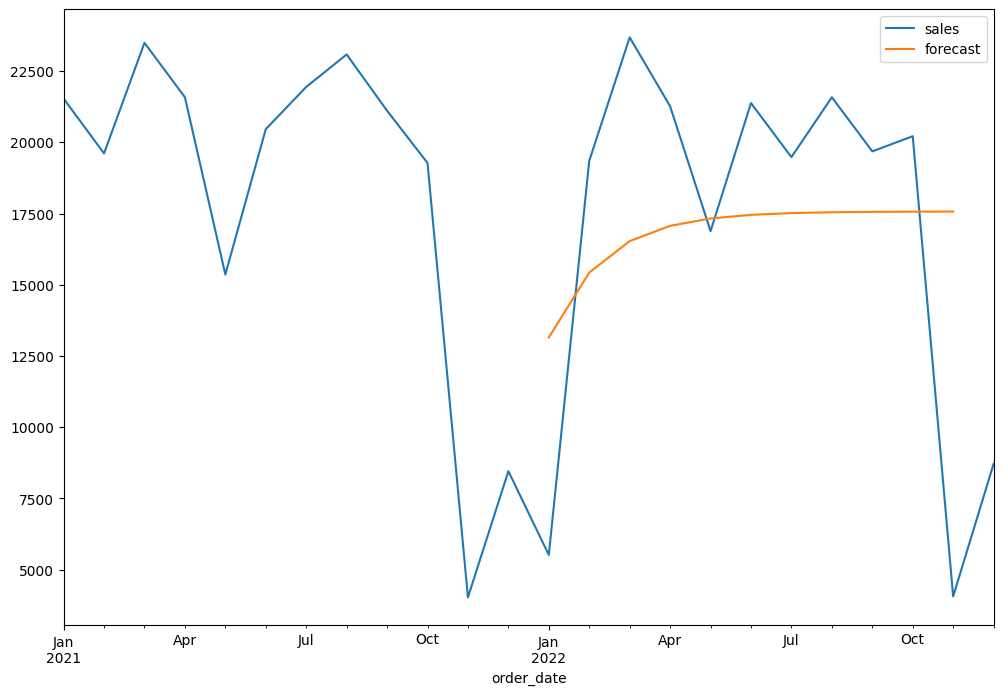

In [42]:
two_years['forecast']=model_fit.predict(start=12,end=22,dynamic=True)
two_years[['sales','forecast']].plot(figsize=(12,8))

An Augmented Dickey Fuller test examines whether the coefficient in the regression is equal to 1. It does not usually have power against seasonal deterministic terms, and so can rejecting using adfuller test and go for seasonal arima that  is SARIMAX . Since data seems to be cyclical every year .from visualisation we consider Seasonality as 12.

# SARIMAX

In [131]:
import statsmodels.api as sm

In [132]:
model=sm.tsa.statespace.SARIMAX(two_years['sales'],order=(1, 0, 0),seasonal_order=(1,0,0,12))
results=model.fit()

With seasonality as 12 we can predict the test data in a decent fashion using trained previous data.Thus suggesting even though the model is stationary according to the AdFuller Test is irrilavent for forecasting in this case.

<Axes: xlabel='order_date'>

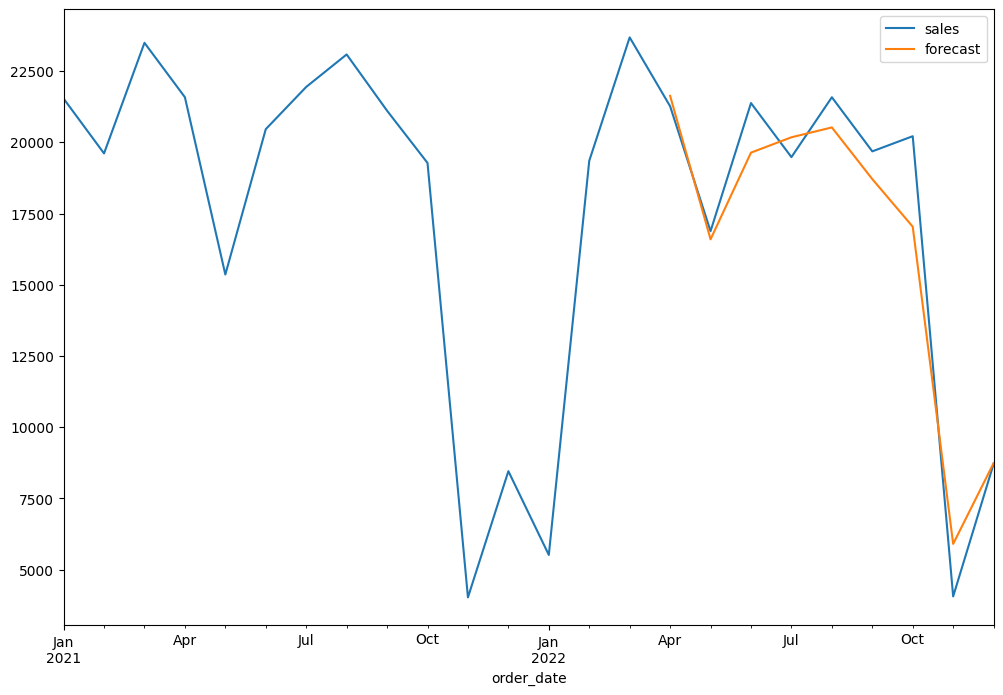

In [133]:
two_years['forecast']=results.predict(start=15,end=23,dynamic=True)
two_years[['sales','forecast']].plot(figsize=(12,8))

We are able to predict the sales accurately with less room for error. To check the efficiency of the model we can verify by comparing the mean and root mean square error of test data and predicted data.


In [134]:
test=two_years.iloc[-9:]
pred=two_years['forecast'].tail(9)

In [135]:
test['sales'].mean()

17027.666666666668

In [136]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['sales']))
print(rmse)

1463.55150234012


There is an erroe of 1463 deviating from the mean value of 17027. Suggesting the model is fairly accurate in predicting the sales based on the past data.

#   FORECASTING


In [143]:
from pandas.tseries.offsets import DateOffset
monthly_sales_2023=[two_years.index[-1]+DateOffset(months=x)for x in range(0,12)]

Adding future dates to existing date column for FORECASTING

In [144]:
monthly_sales_2023=pd.DataFrame(index=monthly_sales_2023[1:],columns=two_years.columns)

In [145]:
monthly_sales_2023.head()

,month,sales,forecast
2023-01-01,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN


In [146]:
monthly_sales_2023=pd.concat([two_years,monthly_sales_2023])

In [147]:
#forecasted data
monthly_sales_2023.tail()

,month,sales,forecast
2023-07-01,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN


<Axes: >

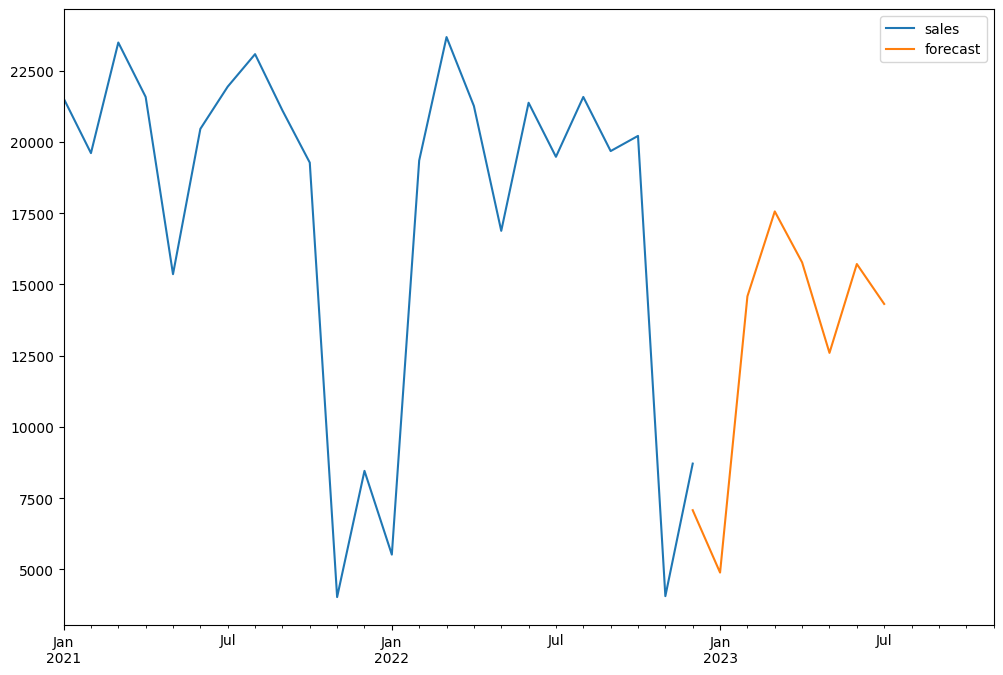

In [148]:
monthly_sales_2023['forecast']=results.predict(start=23, end=30,dynamic=True)
monthly_sales_2023[['sales','forecast']].plot(figsize=(12,8))

Since two years of data is not enough to train the model and forecast long term results,as it may lead to more inaccuracte predictions. Therefore it is ideal to focus on short term forecasting of future sales for the next six months based on the past data.

There is a prediction of downfall in sales as per the projections. Thus, calling for an action to take measures to preventing it from happening.

And the solutions to problems of the futures lies in the past.A comprehensive analysis of the money spent on marketing of the products is necessary.To ensure that the money is spent strategically where the returns are high.

Market Mix Modellling Approach is the key to understand the things that needs to be changed for maximum gains.